<a href="https://colab.research.google.com/github/zzh2027/zzh2027.github.io/blob/master/Airbnb_Price_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **导入Train文件**

In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

KeyboardInterrupt: ignored

# **Use googledrive to upload**

In [0]:
import pandas as pd
d = pd.read_csv(fn)
d.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,"Beautiful, sunlit brownstone 1-bedroom in the ...",2016-06-18,t,t,NaN,2012-03-26,f,2016-07-18,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,Enjoy travelling during your stay in Manhattan...,2017-08-05,t,f,100%,2017-06-19,t,2017-09-23,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,The Oasis comes complete with a full backyard ...,2017-04-30,t,t,100%,2016-10-25,t,2017-09-14,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,This light-filled home-away-from-home is super...,NaN,t,t,NaN,2015-04-19,f,NaN,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,"Cool, cozy, and comfortable studio located in ...",2015-05-12,t,t,100%,2015-03-01,t,2017-01-22,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


## **Check the missing values**

In [0]:
d.isnull().sum(axis=0)

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     966
bedrooms                     91
beds                        131
dtype: int64

## **Transform the column"amenities"**

In [0]:
type(d.amenities[0])

In [0]:
d.amenities.head(10)

In [0]:
amenities = d[['amenities']]
print(type(amenities))

'''print(amenities.head(1))
print(amenities.loc[0][0])'''
#print(len(amenities))
a = amenities.loc[0][0]
print(type(a))
'''
aa = a.strip('{}"')
bb = aa.split(',')
print(aa)
print(bb)
'''
def rm_quotation_mark(str):
    if not str:
        return False
    aa = str.strip('{}"')
    bb = aa.split(',')
    for i in range(len(bb)):
        bb[i] = bb[i].strip('""')
    return bb
'''
print(rm_quotation_mark(a))
print(len(amenities.loc[:]))
print(amenities.loc[2][0])
'''
def new_amenities(df):
    Amen = []
    i = 0
    while i < len(df.loc[:]):
        y = df.loc[i][0]
        Amen.append(rm_quotation_mark(y))
        i+=1
    return Amen
Amenities = new_amenities(amenities)
print(len(Amenities))
print(Amenities[12][0])
print(Amenities[19])
print(type(Amenities))
Amenity = pd.Series(Amenities)
d['Amenity'] =Amenity
print(d.head(10))
print(d.Amenity[0])
print(d.Amenity[20][0])

<class 'pandas.core.frame.DataFrame'>
<class 'str'>
74111
TV
['TV', 'Wireless Internet', 'Air conditioning', 'Kitchen', 'Breakfast', 'Heating', 'Smoke detector', 'Fire extinguisher', 'Essentials', 'Lock on bedroom door', 'Hangers', 'Hair dryer', 'Iron', 'Laptop friendly workspace', 'Private entrance', 'Hot water', 'Bed linens', 'Extra pillows and blankets', 'Microwave', 'Refrigerator', 'Dishes and silverware', 'Cooking basics', 'Oven', 'Stove']
<class 'list'>
         id  log_price  ... beds                                            Amenity
0   6901257   5.010635  ...  1.0  [Wireless Internet, Air conditioning, Kitchen,...
1   6304928   5.129899  ...  3.0  [Wireless Internet, Air conditioning, Kitchen,...
2   7919400   4.976734  ...  3.0  [TV, Cable TV, Wireless Internet, Air conditio...
3  13418779   6.620073  ...  2.0  [TV, Cable TV, Internet, Wireless Internet, Ki...
4   3808709   4.744932  ...  1.0  [TV, Internet, Wireless Internet, Air conditio...
5  12422935   4.442651  ...  1.0

In [0]:
print(type(d.Amenity[13]))
print(d.Amenity[20][1])

In [0]:
print(d.columns.values)
d.drop(['amenities'], axis = 1,inplace = True)


['id' 'log_price' 'property_type' 'room_type' 'amenities' 'accommodates'
 'bathrooms' 'bed_type' 'cancellation_policy' 'cleaning_fee' 'city'
 'description' 'first_review' 'host_has_profile_pic'
 'host_identity_verified' 'host_response_rate' 'host_since'
 'instant_bookable' 'last_review' 'latitude' 'longitude' 'name'
 'neighbourhood' 'number_of_reviews' 'review_scores_rating'
 'thumbnail_url' 'zipcode' 'bedrooms' 'beds' 'Amenity']


In [0]:
drop_idx = pd.Series(d.columns.values, \
          index = range(len(d.columns.values)))
print(drop_idx)

0                         id
1                  log_price
2              property_type
3                  room_type
4               accommodates
5                  bathrooms
6                   bed_type
7        cancellation_policy
8               cleaning_fee
9                       city
10               description
11              first_review
12      host_has_profile_pic
13    host_identity_verified
14        host_response_rate
15                host_since
16          instant_bookable
17               last_review
18                  latitude
19                 longitude
20                      name
21             neighbourhood
22         number_of_reviews
23      review_scores_rating
24             thumbnail_url
25                   zipcode
26                  bedrooms
27                      beds
28                   Amenity
dtype: object


In [0]:
drop_2 = drop_idx.drop([10,11,17,18,19,20,21,24,25])
d1 = d[drop_2]
len(d1.columns)
d1.head()

,id,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,number_of_reviews,review_scores_rating,bedrooms,beds,Amenity
0,6901257,5.010635,Apartment,Entire home/apt,3,1.0,Real Bed,strict,True,NYC,t,t,NaN,2012-03-26,f,2,100.0,1.0,1.0,"[Wireless Internet, Air conditioning, Kitchen,..."
1,6304928,5.129899,Apartment,Entire home/apt,7,1.0,Real Bed,strict,True,NYC,t,f,100%,2017-06-19,t,6,93.0,3.0,3.0,"[Wireless Internet, Air conditioning, Kitchen,..."
2,7919400,4.976734,Apartment,Entire home/apt,5,1.0,Real Bed,moderate,True,NYC,t,t,100%,2016-10-25,t,10,92.0,1.0,3.0,"[TV, Cable TV, Wireless Internet, Air conditio..."
3,13418779,6.620073,House,Entire home/apt,4,1.0,Real Bed,flexible,True,SF,t,t,NaN,2015-04-19,f,0,NaN,2.0,2.0,"[TV, Cable TV, Internet, Wireless Internet, Ki..."
4,3808709,4.744932,Apartment,Entire home/apt,2,1.0,Real Bed,moderate,True,DC,t,t,100%,2015-03-01,t,4,40.0,0.0,1.0,"[TV, Internet, Wireless Internet, Air conditio..."


In [0]:
d1.isnull().sum()

### **Transform the 'cleaning_fee' column to 'has_cleaning_fee'**




In [0]:
def helper(x):
    if x is True:
        return 1
    else:
        return 0
d1['has_cleaning_fee']= d1.cleaning_fee.apply(lambda x: helper(x))
d1.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,id,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,number_of_reviews,review_scores_rating,bedrooms,beds,Amenity,has_cleaning_fee
0,6901257,5.010635,Apartment,Entire home/apt,3,1.0,Real Bed,strict,True,NYC,t,t,NaN,2012-03-26,f,2,100.0,1.0,1.0,"[Wireless Internet, Air conditioning, Kitchen,...",1
1,6304928,5.129899,Apartment,Entire home/apt,7,1.0,Real Bed,strict,True,NYC,t,f,100%,2017-06-19,t,6,93.0,3.0,3.0,"[Wireless Internet, Air conditioning, Kitchen,...",1
2,7919400,4.976734,Apartment,Entire home/apt,5,1.0,Real Bed,moderate,True,NYC,t,t,100%,2016-10-25,t,10,92.0,1.0,3.0,"[TV, Cable TV, Wireless Internet, Air conditio...",1
3,13418779,6.620073,House,Entire home/apt,4,1.0,Real Bed,flexible,True,SF,t,t,NaN,2015-04-19,f,0,NaN,2.0,2.0,"[TV, Cable TV, Internet, Wireless Internet, Ki...",1
4,3808709,4.744932,Apartment,Entire home/apt,2,1.0,Real Bed,moderate,True,DC,t,t,100%,2015-03-01,t,4,40.0,0.0,1.0,"[TV, Internet, Wireless Internet, Air conditio...",1


### **Transform the column 'city' to categorical values**

In [0]:
cnt = 0
for i in d1.city.unique():
    d1.loc[(d1.city == i), 'City_idx'] = cnt
    cnt+=1
d1.head()


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,id,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,number_of_reviews,review_scores_rating,bedrooms,beds,Amenity,has_cleaning_fee,City_idx
0,6901257,5.010635,Apartment,Entire home/apt,3,1.0,Real Bed,strict,True,NYC,t,t,NaN,2012-03-26,f,2,100.0,1.0,1.0,"[Wireless Internet, Air conditioning, Kitchen,...",1,0.0
1,6304928,5.129899,Apartment,Entire home/apt,7,1.0,Real Bed,strict,True,NYC,t,f,100%,2017-06-19,t,6,93.0,3.0,3.0,"[Wireless Internet, Air conditioning, Kitchen,...",1,0.0
2,7919400,4.976734,Apartment,Entire home/apt,5,1.0,Real Bed,moderate,True,NYC,t,t,100%,2016-10-25,t,10,92.0,1.0,3.0,"[TV, Cable TV, Wireless Internet, Air conditio...",1,0.0
3,13418779,6.620073,House,Entire home/apt,4,1.0,Real Bed,flexible,True,SF,t,t,NaN,2015-04-19,f,0,NaN,2.0,2.0,"[TV, Cable TV, Internet, Wireless Internet, Ki...",1,1.0
4,3808709,4.744932,Apartment,Entire home/apt,2,1.0,Real Bed,moderate,True,DC,t,t,100%,2015-03-01,t,4,40.0,0.0,1.0,"[TV, Internet, Wireless Internet, Air conditio...",1,2.0


### **Transform 'property_type' to 'New_type'**

In [0]:
#count the number of each element in d1.property_type
prop = {}
for i in d1.property_type:
    if i in prop:
        prop[i]+=1
    else:
        prop[i] = 1
print(prop)
##d1.property_type.value_counts()
d1['property'] = d1['property_type']#Add a new column
d1.property.loc[(d1.property != 'Apartment')&(d1.property != 'House')] = 'Other'
d1.property.unique()#array(['Apartment', 'House', 'Other'], dtype=object)

{'Apartment': 49003, 'House': 16511, 'Condominium': 2658, 'Loft': 1244, 'Townhouse': 1692, 'Hostel': 70, 'Guest suite': 123, 'Bed & Breakfast': 462, 'Bungalow': 366, 'Guesthouse': 498, 'Dorm': 142, 'Other': 607, 'Camper/RV': 94, 'Villa': 179, 'Boutique hotel': 69, 'Timeshare': 77, 'In-law': 71, 'Boat': 65, 'Serviced apartment': 21, 'Castle': 13, 'Cabin': 72, 'Treehouse': 7, 'Tipi': 3, 'Vacation home': 11, 'Tent': 18, 'Hut': 8, 'Casa particular': 1, 'Chalet': 6, 'Yurt': 9, 'Earth House': 4, 'Parking Space': 1, 'Train': 2, 'Cave': 2, 'Lighthouse': 1, 'Island': 1}


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.pa

array(['Apartment', 'House', 'Other'], dtype=object)

### **number_of_reviews**

In [0]:
nums = {}
for j in d1.number_of_reviews:
    if j in nums:
        nums[j] += 1
    else:
        nums[j] = 1
print(nums)

N= sorted(nums.items(), key = lambda item:item[1], reverse =True)
print(N[:10])

{2: 4750, 6: 2032, 10: 1327, 0: 15819, 4: 2912, 3: 3661, 15: 946, 9: 1441, 159: 18, 82: 103, 29: 425, 13: 1022, 12: 1072, 26: 513, 5: 2518, 57: 181, 73: 109, 14: 981, 1: 7106, 40: 282, 248: 5, 46: 233, 17: 712, 138: 42, 11: 1162, 44: 262, 34: 335, 85: 89, 18: 768, 31: 427, 30: 373, 19: 700, 25: 508, 22: 551, 23: 560, 28: 470, 7: 1851, 32: 394, 144: 28, 16: 833, 38: 306, 105: 53, 59: 159, 67: 152, 21: 610, 120: 46, 8: 1678, 61: 163, 87: 83, 206: 9, 43: 247, 104: 54, 47: 229, 63: 145, 186: 9, 36: 366, 27: 451, 167: 21, 48: 224, 102: 72, 51: 214, 126: 40, 81: 105, 58: 182, 72: 111, 68: 121, 107: 47, 79: 96, 98: 51, 39: 294, 187: 15, 123: 39, 70: 126, 78: 113, 55: 201, 54: 185, 52: 194, 42: 247, 75: 114, 128: 32, 60: 154, 90: 71, 254: 1, 135: 28, 64: 149, 99: 73, 191: 9, 24: 539, 66: 152, 139: 26, 125: 36, 129: 47, 74: 126, 318: 4, 33: 355, 35: 348, 37: 294, 20: 626, 93: 79, 83: 92, 45: 253, 41: 295, 49: 223, 289: 3, 190: 7, 62: 147, 88: 84, 127: 41, 154: 29, 118: 54, 216: 8, 136: 40, 69: 

In [0]:
#count how many rooms have less than 10 reviews
less10 = 0
for key, value in enumerate(nums):
    if value <= 10:
        less10+=nums[value]
    
print(less10)

### **Drop the column 'last_review'**

In [0]:
d1.isnull().sum()

In [0]:
d1.head()

## Check  and drop rows that have >=3 missing values 

In [0]:
for i in range(6):
    print(
        'How many rows have more than %s missing values: '%(str(i)),sum(d1.isnull().sum(axis = 1)>i)
    )

How many rows have more than 0 missing values:  26324
How many rows have more than 1 missing values:  9156
How many rows have more than 2 missing values:  262
How many rows have more than 3 missing values:  215
How many rows have more than 4 missing values:  50
How many rows have more than 5 missing values:  0


In [0]:
d2 = d1.dropna(thresh = len(d1.columns.values) - 2)
for i in range(6):
    print(
        'How many rows have more than %s missing values: '%(str(i)),sum(d2.isnull().sum(axis = 1)>i)
    )

How many rows have more than 0 missing values:  26062
How many rows have more than 1 missing values:  8894
How many rows have more than 2 missing values:  0
How many rows have more than 3 missing values:  0
How many rows have more than 4 missing values:  0
How many rows have more than 5 missing values:  0


In [0]:
d2.reset_index(drop = True, inplace = True)
d2.isnull().sum()

id                            0
log_price                     0
property_type                 0
room_type                     0
accommodates                  0
bathrooms                   152
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
host_has_profile_pic          0
host_identity_verified        0
host_response_rate        18055
host_since                    0
instant_bookable              0
number_of_reviews             0
review_scores_rating      16610
bedrooms                     69
beds                         70
Amenity                       0
has_cleaning_fee              0
City_idx                      0
property                      0
dtype: int64

## Select the top 10 amenities in Amenity

In [0]:
amen = {}
for i in d2.Amenity:
    for j in i:
        if j in amen:
            amen[j] += 1
        else:
            amen[j] = 1
print(amen)

{'Wireless Internet': 71042, 'Air conditioning': 55031, 'Kitchen': 67311, 'Heating': 66860, 'Family/kid friendly': 36943, 'Essentials': 63826, 'Hair dryer': 43234, 'Iron': 41578, 'translation missing: en.hosting_amenity_50': 25210, 'Washer': 43069, 'Dryer': 42614, 'Smoke detector': 61555, 'Fire extinguisher': 30661, 'Shampoo': 49341, 'Hangers': 49043, 'TV': 52309, 'Cable TV': 24191, 'Breakfast': 8288, 'Buzzer/wireless intercom': 16940, 'Carbon monoxide detector': 47069, 'Laptop friendly workspace': 43591, 'Internet': 44513, 'Indoor fireplace': 9285, 'First aid kit': 27468, 'Elevator in building': 6412, 'Pool': 6274, 'Free parking on premises': 23601, 'Gym': 7469, 'Hot tub': 6317, 'Wheelchair accessible': 4833, 'Doorman': 4757, 'Dog(s)': 5246, 'Cat(s)': 3582, 'Other pet(s)': 378, 'Lock on bedroom door': 17929, 'Pets live on this property': 9703, 'Private entrance': 7253, 'Hot water': 4255, 'Bed linens': 4162, 'Extra pillows and blankets': 3015, 'Coffee maker': 3548, 'Refrigerator': 4638

In [0]:
A = sorted(amen.items(), key = lambda item:item[1], reverse =True)
print(A[:10])
        
    

[('Wireless Internet', 71042), ('Kitchen', 67311), ('Heating', 66860), ('Essentials', 63826), ('Smoke detector', 61555), ('Air conditioning', 55031), ('TV', 52309), ('Shampoo', 49341), ('Hangers', 49043), ('Carbon monoxide detector', 47069)]


In [0]:
B =A[:10]
top_10_amenity = []
for i in B:
    top_10_amenity.append(i[0])
print(top_10_amenity)

['Wireless Internet', 'Kitchen', 'Heating', 'Essentials', 'Smoke detector', 'Air conditioning', 'TV', 'Shampoo', 'Hangers', 'Carbon monoxide detector']


In [0]:
print(type(top_10_amenity[0]))
print(top_10_amenity[0])

<class 'str'>
Wireless Internet


### **try to add values**

In [0]:
has_internet = []
for i in d2.Amenity:
    if top_10_amenity[0] in i:
        has_internet.append(1)
    else:
        has_internet.append(0)
print(len(has_internet))
print(len(d2))

73849
73849


## **Make new list with bin values**

In [0]:
AMEN = [[],[],[],[],[],
        [],[],[],[],[]]
for k in range(len(AMEN)):
    for i in d2.Amenity:
        if top_10_amenity[k] in i:
            AMEN[k].append(1)
        else:
            AMEN[k].append(0)
#print(AMEN)
        

## **Make it into dataframe**

In [0]:
has_amenity = pd.DataFrame(AMEN).T
print(has_amenity.head())

   0  1  2  3  4  5  6  7  8  9
0  1  1  1  1  0  1  0  0  0  0
1  1  1  1  1  1  1  0  1  1  0
2  1  1  1  1  1  1  1  1  1  1
3  1  1  1  1  1  0  1  0  0  1
4  1  1  1  1  1  1  1  1  0  1


## **Rename the dataframe**

In [0]:
has_amenity.rename(columns = {0:'has_internet', 1:'has_kitchen', 2:'has_heating', 3:'has_essentials', 4:'has_smoke_detector', 5:'has_aircon', 6:'has_tv', 7:'has_shampoo', 8:'has_hangers', 9:'has_cmd'}, inplace = True)
has_amenity.reset_index(drop = True, inplace = True)
has_amenity.tail()

,has_internet,has_kitchen,has_heating,has_essentials,has_smoke_detector,has_aircon,has_tv,has_shampoo,has_hangers,has_cmd
73844,0,0,0,0,0,0,0,0,0,0
73845,1,1,1,1,1,0,1,1,1,0
73846,1,1,1,1,1,1,1,1,1,1
73847,1,1,1,1,1,1,1,1,1,1
73848,1,1,1,1,1,0,1,1,1,1


In [0]:
d2.head()

## **New data frame after concatenating with old one**

In [0]:
d3 = pd.concat([d2,has_amenity], axis =1)

In [0]:
d3.head()

,id,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,number_of_reviews,review_scores_rating,bedrooms,beds,Amenity,has_cleaning_fee,City_idx,property,has_internet,has_kitchen,has_heating,has_essentials,has_smoke_detector,has_aircon,has_tv,has_shampoo,has_hangers,has_cmd
0,6901257,5.010635,Apartment,Entire home/apt,3,1.0,Real Bed,strict,True,NYC,t,t,NaN,2012-03-26,f,2,100.0,1.0,1.0,"[Wireless Internet, Air conditioning, Kitchen,...",1,0.0,Apartment,1,1,1,1,0,1,0,0,0,0
1,6304928,5.129899,Apartment,Entire home/apt,7,1.0,Real Bed,strict,True,NYC,t,f,100%,2017-06-19,t,6,93.0,3.0,3.0,"[Wireless Internet, Air conditioning, Kitchen,...",1,0.0,Apartment,1,1,1,1,1,1,0,1,1,0
2,7919400,4.976734,Apartment,Entire home/apt,5,1.0,Real Bed,moderate,True,NYC,t,t,100%,2016-10-25,t,10,92.0,1.0,3.0,"[TV, Cable TV, Wireless Internet, Air conditio...",1,0.0,Apartment,1,1,1,1,1,1,1,1,1,1
3,13418779,6.620073,House,Entire home/apt,4,1.0,Real Bed,flexible,True,SF,t,t,NaN,2015-04-19,f,0,NaN,2.0,2.0,"[TV, Cable TV, Internet, Wireless Internet, Ki...",1,1.0,House,1,1,1,1,1,0,1,0,0,1
4,3808709,4.744932,Apartment,Entire home/apt,2,1.0,Real Bed,moderate,True,DC,t,t,100%,2015-03-01,t,4,40.0,0.0,1.0,"[TV, Internet, Wireless Internet, Air conditio...",1,2.0,Apartment,1,1,1,1,1,1,1,1,0,1


## **Remove records with log_price as 0**

In [0]:
d4 = d3[d3.log_price != 0 ]
#d4.head()

## **Use groupby to fill the missing values in 'review_scores_rating'**

In [0]:
d4.review_scores_rating.fillna(d4.groupby([ 'cancellation_policy'])\
                               ['review_scores_rating'].transform('median'),\
                               inplace = True)
d4.isnull().sum()

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


id                            0
log_price                     0
property_type                 0
room_type                     0
accommodates                  0
bathrooms                   152
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
host_has_profile_pic          0
host_identity_verified        0
host_response_rate        18055
host_since                    0
instant_bookable              0
number_of_reviews             0
review_scores_rating          0
bedrooms                     69
beds                         70
Amenity                       0
has_cleaning_fee              0
City_idx                      0
property                      0
has_internet                  0
has_kitchen                   0
has_heating                   0
has_essentials                0
has_smoke_detector            0
has_aircon                    0
has_tv                        0
has_shampoo                   0
has_hang

## **Transform the 3 columns for imputation in target column 'host_response_rate'**

In [0]:
print(d4.host_has_profile_pic.unique())
d4.host_has_profile_pic.loc[d4.host_has_profile_pic==d4.host_has_profile_pic.unique()[0]] = 0
d4.host_has_profile_pic.loc[d4.host_has_profile_pic==d4.host_has_profile_pic.unique()[1]] = 1
print(d4.host_has_profile_pic.unique())

['t' 'f']


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


[0 1]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
print(d4.host_identity_verified.unique())
d4.host_identity_verified.loc[d4.host_identity_verified==d4.host_identity_verified.unique()[0]] = 0
d4.host_identity_verified.loc[d4.host_identity_verified==d4.host_identity_verified.unique()[1]] = 1
print(d4.host_identity_verified.unique())

['t' 'f']


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


[0 1]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
d4.host_response_rate = d4.host_response_rate.str.strip("%").astype(float)/100;

d4.host_response_rate.fillna(d4.groupby(
    [ 'host_has_profile_pic', 'host_identity_verified'])\
                             ['host_response_rate'].transform('median'),\
                             inplace = True)
d4.isnull().sum()

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


id                          0
log_price                   0
property_type               0
room_type                   0
accommodates                0
bathrooms                 152
bed_type                    0
cancellation_policy         0
cleaning_fee                0
city                        0
host_has_profile_pic        0
host_identity_verified      0
host_response_rate          0
host_since                  0
instant_bookable            0
number_of_reviews           0
review_scores_rating        0
bedrooms                   69
beds                       70
Amenity                     0
has_cleaning_fee            0
City_idx                    0
property                    0
has_internet                0
has_kitchen                 0
has_heating                 0
has_essentials              0
has_smoke_detector          0
has_aircon                  0
has_tv                      0
has_shampoo                 0
has_hangers                 0
has_cmd                     0
dtype: int

## **Imputate the rest 3 columns.**

In [0]:
d4.bathrooms.fillna(d4.bathrooms.mode()[0],inplace = True)
d4.bedrooms.fillna(d4.bedrooms.mode()[0],inplace = True)
d4.beds.fillna(d4.beds.mode()[0],inplace = True)
d4.isnull().any().sum()

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


0

# **This should have work↓**

In [0]:
has_amenity = pd.DataFrame(
    {'has_internet':list(range(73849)), 'has_kitchen': list(range(73849)),'has_heating': list(range(73849)),'has_essentials': list(range(73849)),
     'has_smoke_detector':list(range(73849)), 'has_aircon':list(range(73849)), 'has_tv':list(range(73849)), 'has_shampoo':list(range(73849)), 'has_hangers':list(range(73849)), 'has_cmd':list(range(73849))
                           })
def add_vals(df):
    for i in range(len(df.columns.values)):
        col = df.columns.values[i]
        for j in range(len(d2.Amenity)):
            if top_10_amenity[i] in d2.Amenity[j]:
                df.at[j,col] = 1
            else:
                df.at[j,col] = 0
                
add_vals(has_amenity)
print(has_amenity.head())

KeyError: ignored

## **Save it as csv.file**

In [0]:
from google.colab import files

d3.to_csv('df.csv',index = False)
files.download('df.csv')

## **Fill the null value in column 'review_scores_rating' using groupby**

In [0]:
'''
d2 = d1.copy()
d2.review_scores_rating.fillna(d2.groupby(['room_type', 'property_type', 'cleaning_fee', 'cancellation_policy'])['review_scores_rating'].transform('median'),inplace = True)
d2.isnull().sum()
d2.review_scores_rating.fillna(d2.groupby(['room_type', 'property_type'])['review_scores_rating'].transform('median'),inplace = True)
d2.isnull().sum()
'''

id                            0
log_price                     0
property_type                 0
room_type                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
number_of_reviews             0
review_scores_rating         33
bedrooms                     91
beds                        131
Amenity                       0
has_cleaning_fee              0
dtype: int64

# **Word Cloud**

In [0]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
d3.head()

,id,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,number_of_reviews,review_scores_rating,bedrooms,beds,Amenity,has_cleaning_fee,has_internet,has_kitchen,has_heating,has_essentials,has_smoke_detector,has_aircon,has_tv,has_shampoo,has_hangers,has_cmd
0,6901257.0,5.010635,Apartment,Entire home/apt,3.0,1.0,Real Bed,strict,True,NYC,t,t,NaN,2012-03-26,f,2.0,100.0,1.0,1.0,"[Wireless Internet, Air conditioning, Kitchen,...",1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,6304928.0,5.129899,Apartment,Entire home/apt,7.0,1.0,Real Bed,strict,True,NYC,t,f,100%,2017-06-19,t,6.0,93.0,3.0,3.0,"[Wireless Internet, Air conditioning, Kitchen,...",1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0
2,7919400.0,4.976734,Apartment,Entire home/apt,5.0,1.0,Real Bed,moderate,True,NYC,t,t,100%,2016-10-25,t,10.0,92.0,1.0,3.0,"[TV, Cable TV, Wireless Internet, Air conditio...",1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,13418779.0,6.620073,House,Entire home/apt,4.0,1.0,Real Bed,flexible,True,SF,t,t,NaN,2015-04-19,f,0.0,NaN,2.0,2.0,"[TV, Cable TV, Internet, Wireless Internet, Ki...",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
4,3808709.0,4.744932,Apartment,Entire home/apt,2.0,1.0,Real Bed,moderate,True,DC,t,t,100%,2015-03-01,t,4.0,40.0,0.0,1.0,"[TV, Internet, Wireless Internet, Air conditio...",1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0


In [0]:
print('There are {} observations and {} features in this dataset. \n'.format(d3.shape[0], d3.shape[1]))
print('There are {} types of amenity in this dataset such as {}... \n'.format(len(amen), 
                                                                             ','.join(i for i in amen.keys())))
print('And the top 10 are {}'.format(', '.join(i for i in top_10_amenity)))

There are 74108 observations and 31 features in this dataset. 

There are 131 types of amenity in this dataset such as Wireless Internet,Air conditioning,Kitchen,Heating,Family/kid friendly,Essentials,Hair dryer,Iron,translation missing: en.hosting_amenity_50,Washer,Dryer,Smoke detector,Fire extinguisher,Shampoo,Hangers,TV,Cable TV,Breakfast,Buzzer/wireless intercom,Carbon monoxide detector,Laptop friendly workspace,Internet,Indoor fireplace,First aid kit,Elevator in building,Pool,Free parking on premises,Gym,Hot tub,Wheelchair accessible,Doorman,Dog(s),Cat(s),Other pet(s),Lock on bedroom door,Pets live on this property,Private entrance,Hot water,Bed linens,Extra pillows and blankets,Coffee maker,Refrigerator,Dishes and silverware,Garden or backyard,Pets allowed,Safety card,24-hour check-in,Self Check-In,Lockbox,Suitable for events,translation missing: en.hosting_amenity_49,Elevator,Microwave,Cooking basics,Oven,Stove,Smoking allowed,Outlet covers,Bathtub,Dishwasher,Single level home,L

In [0]:
wordcloud = d3[['city','Amenity','log_price']]
wordcloud.head()

,city,Amenity,log_price
0,NYC,"[Wireless Internet, Air conditioning, Kitchen,...",5.010635
1,NYC,"[Wireless Internet, Air conditioning, Kitchen,...",5.129899
2,NYC,"[TV, Cable TV, Wireless Internet, Air conditio...",4.976734
3,SF,"[TV, Cable TV, Internet, Wireless Internet, Ki...",6.620073
4,DC,"[TV, Internet, Wireless Internet, Air conditio...",4.744932


In [0]:
d3.groupby('city').mean().sort_values(by = 'log_price',ascending = False ).head()

,id,log_price,accommodates,bathrooms,number_of_reviews,review_scores_rating,bedrooms,beds,has_cleaning_fee,has_internet,has_kitchen,has_heating,has_essentials,has_smoke_detector,has_aircon,has_tv,has_shampoo,has_hangers,has_cmd
city,,,,,,,,,,,,,,,,,,,
SF,1.120639e+07,5.169831,3.170997,1.259548,28.710129,95.022790,1.348280,1.715688,0.745138,0.958906,0.913125,0.897500,0.863437,0.832031,0.737656,0.697031,0.672031,0.668594,0.645625
DC,1.128756e+07,4.986512,3.541007,1.314417,19.922914,94.830934,1.332394,1.807997,0.661211,0.964317,0.912206,0.905494,0.863452,0.827416,0.749161,0.695107,0.661191,0.650238,0.635753
Boston,1.100847e+07,4.883952,3.301990,1.236926,25.697721,93.597518,1.343723,1.761905,0.764926,0.966435,0.909722,0.912037,0.865451,0.841146,0.747106,0.709201,0.673611,0.673032,0.641782
LA,1.128919e+07,4.720429,3.409334,1.350724,21.332456,94.304133,1.335373,1.864446,0.780787,0.961175,0.909677,0.903990,0.862657,0.837535,0.747302,0.709104,0.669652,0.664457,0.640410
NYC,1.127766e+07,4.719387,2.820391,1.131117,18.134030,93.509081,1.160977,1.558577,0.707890,0.961482,0.912944,0.907170,0.865218,0.831663,0.744920,0.708462,0.666292,0.665356,0.632768


In [0]:
d3.groupby('city').describe().head(7)

id                                      ... has_cmd               
           count          mean           std     min  ...     25%  50%  75%  max
city                                                  ...                       
Boston    3467.0  1.100847e+07  6.192742e+06  6715.0  ...     0.0  1.0  1.0  1.0
Chicago   3719.0  1.132062e+07  6.083140e+06  5506.0  ...     0.0  1.0  1.0  1.0
DC        5682.0  1.128756e+07  6.121282e+06   941.0  ...     0.0  1.0  1.0  1.0
LA       22412.0  1.128919e+07  6.072524e+06   344.0  ...     0.0  1.0  1.0  1.0
NYC      32142.0  1.127766e+07  6.074073e+06  2404.0  ...     0.0  1.0  1.0  1.0
SF        6427.0  1.120639e+07  6.056293e+06  3781.0  ...     0.0  1.0  1.0  1.0

[6 rows x 152 columns]

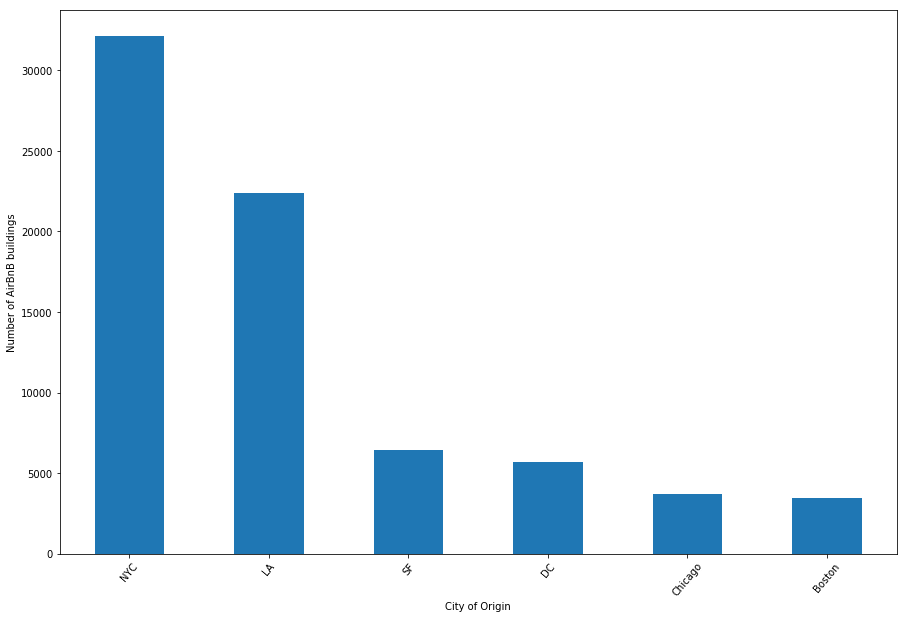

In [0]:
city = d3.groupby('city')
plt.figure(figsize = (15,10))
city.size().sort_values(ascending = False).plot.bar()
plt.xticks(rotation = 50)
plt.xlabel('City of Origin')
plt.ylabel('Number of AirBnB buildings')
plt.show()

In [0]:
?WordCloud

In [0]:
type(d3.Amenity[1])

list

How possible!


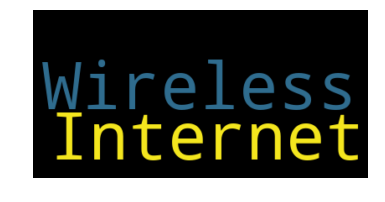

In [0]:
text = []
try:
    for _ in d3.Amenity:
        for j in _:
            text.append(j)
except TypeError:
    print('How possible!')

wordcloud = WordCloud().generate(text[0])
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()